In [116]:
import pandas as pd
import numpy as np

df = pd.read_csv('NL/BAM_annotations_Jeroen_new.csv')

df.head()

df = df.replace(np.nan, '', regex=True)

#df.loc[df['class'] != 'undamaged']

to_annotate = df.loc[(df['class'] != 'undamaged') & (df['stacked'] == True)]
to_annotate.head()





,Unnamed: 0,filename,class,severity,signtype,stacked,latitude,longitude,xmin,ymin,xmax,ymax,origin,width,height,area,coordinates,coordinates_string
120,120,00120.jpg,,,,1,52.423219,4.646042,5,7,50,85,../data/BAM_ZKIJ_20180518/PANOS_3/Recording_24...,45,78,3510,"[52.42321889735757, 4.646041906513415]","[52.42321889735757, 4.646041906513415]"
121,121,00121.jpg,,,,1,52.423219,4.646042,5,5,44,53,../data/BAM_ZKIJ_20180518/PANOS_3/Recording_24...,39,48,1872,"[52.42321889735757, 4.646041906513415]","[52.42321889735757, 4.646041906513415]"
122,122,00122.jpg,,,,1,52.423219,4.646042,5,5,37,45,../data/BAM_ZKIJ_20180518/PANOS_3/Recording_24...,32,40,1280,"[52.42321889735757, 4.646041906513415]","[52.42321889735757, 4.646041906513415]"
123,123,00123.jpg,,,,1,52.423219,4.646042,5,5,31,23,../data/BAM_ZKIJ_20180518/PANOS_3/Recording_24...,26,18,468,"[52.42321889735757, 4.646041906513415]","[52.42321889735757, 4.646041906513415]"
124,124,00124.jpg,,,,1,52.423219,4.646042,5,5,33,38,../data/BAM_ZKIJ_20180518/PANOS_3/Recording_24...,28,33,924,"[52.42321889735757, 4.646041906513415]","[52.42321889735757, 4.646041906513415]"


In [117]:
df['class'].unique()

array(['', 'undamaged', 'graffity', 'scratched', 'bent', 'crooked',
       'incomplete', 'dirty', 'swivelled', 'faded'], dtype=object)

In [121]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

to_annotate = df.loc[(df['stacked'] == True) & (df['class'] != 'crooked') & (df['class'] != 'swivelled') & (df['class'] != 'undamaged') & (df['class'] != '')]

print('amount of images:')
print(len(to_annotate['coordinates_string']))
print('amount of unique pole locations:')
print(len(to_annotate['coordinates_string'].unique()))

series = to_annotate['coordinates_string'].unique()

amount of images:
692
amount of unique pole locations:
77


Current series
Images: 11
Class: graffity


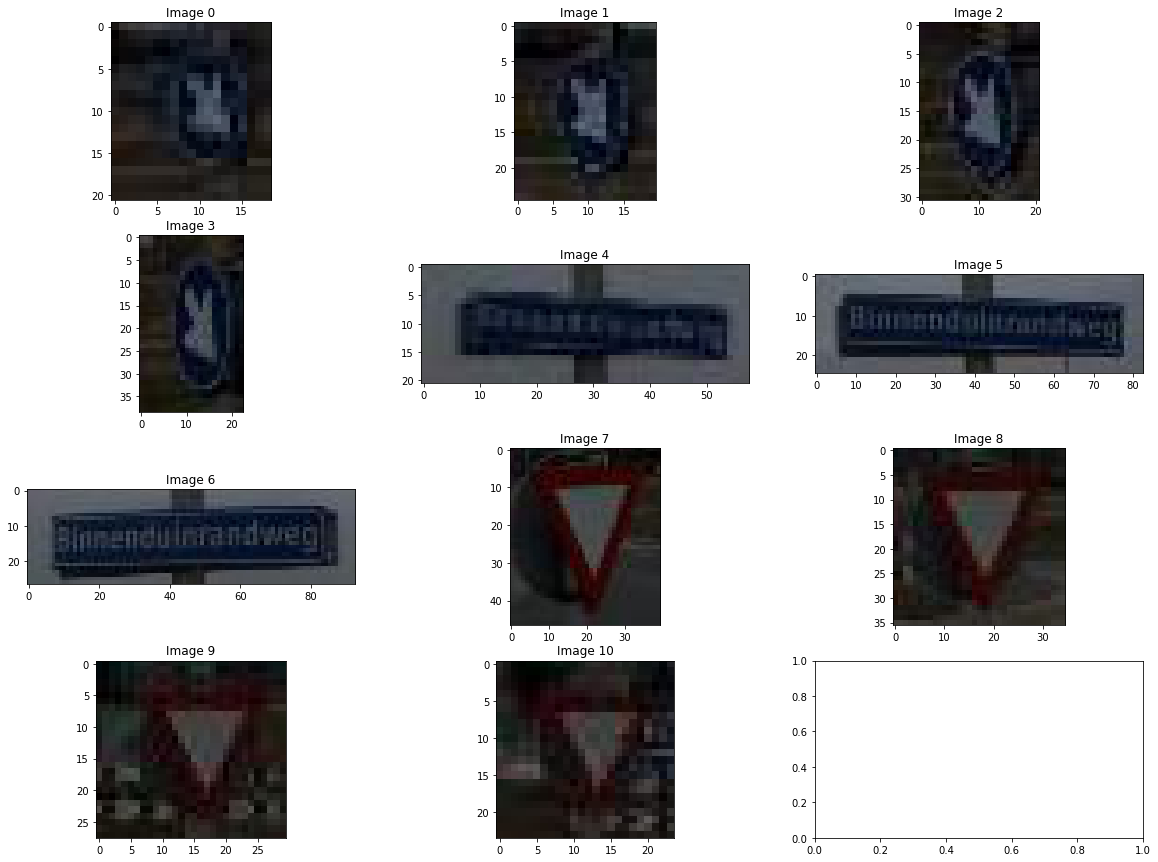

In [134]:
from matplotlib import rcParams
import math

%matplotlib inline

# figure size in inches optional


def print_series(serie, labels=[]):

    rcParams['figure.figsize'] = 20 , 15
    
    print('Current series')
    print('Images: %d' % len(serie))
    print('Class: %s' % serie['class'].unique()[0])
        
    num = len(serie)
    fig, ax = plt.subplots(math.ceil(num/3),3)
    
    
    for (i, fn) in enumerate(serie['filename']):
            
        col = i % 3
        row = i // 3
        
        img=mpimg.imread('NL/' + fn)
        if (len(labels) > 0):
            cur_label = '???'
            for label in labels:
                if (label[0] == fn):
                    cur_label = label[1]
            ax[row,col].set_title('Image %d Label %s' % (i, cur_label))
        else:
            ax[row,col].set_title('Image %d' % i)
        ax[row,col].imshow(img)
        #ax[col,row].show()
        
        #display(Image('NL/'+fn))
    plt.show()

for elem in series[0:1]:
    serie = (df[df['coordinates_string']==elem])
    print_series(serie)
    

ANNOTATE STUFF

In [151]:
annot_total = []

In [152]:
serie_i = 0

In [301]:
serie_i

39

In [417]:
# GET NEXT SERIES
serie_i = serie_i + 1
print('New series %d out of %d' % (serie_i, len(series)))

New series 77 out of 77


In [420]:
# ANNOTATION
from pigeon import annotate
from IPython.display import display, Image

def show_my_image(fn):
    img=mpimg.imread('NL/' + fn)
    imgplot = plt.imshow(img)
    plt.show()

for (i, elem) in enumerate(series[serie_i:serie_i+1]):
    
    print('Series %d' % serie_i)
    serie = (df[df['coordinates_string']==elem])
    print_series(serie)
    
    rcParams['figure.figsize'] = 10 , 10
    
    annotations = annotate(
        serie['filename'],
        options=['undamaged', 'damaged', '???', 'nosign'],
        display_fn=show_my_image
    )

Current series
Images: 7
Class: scratched


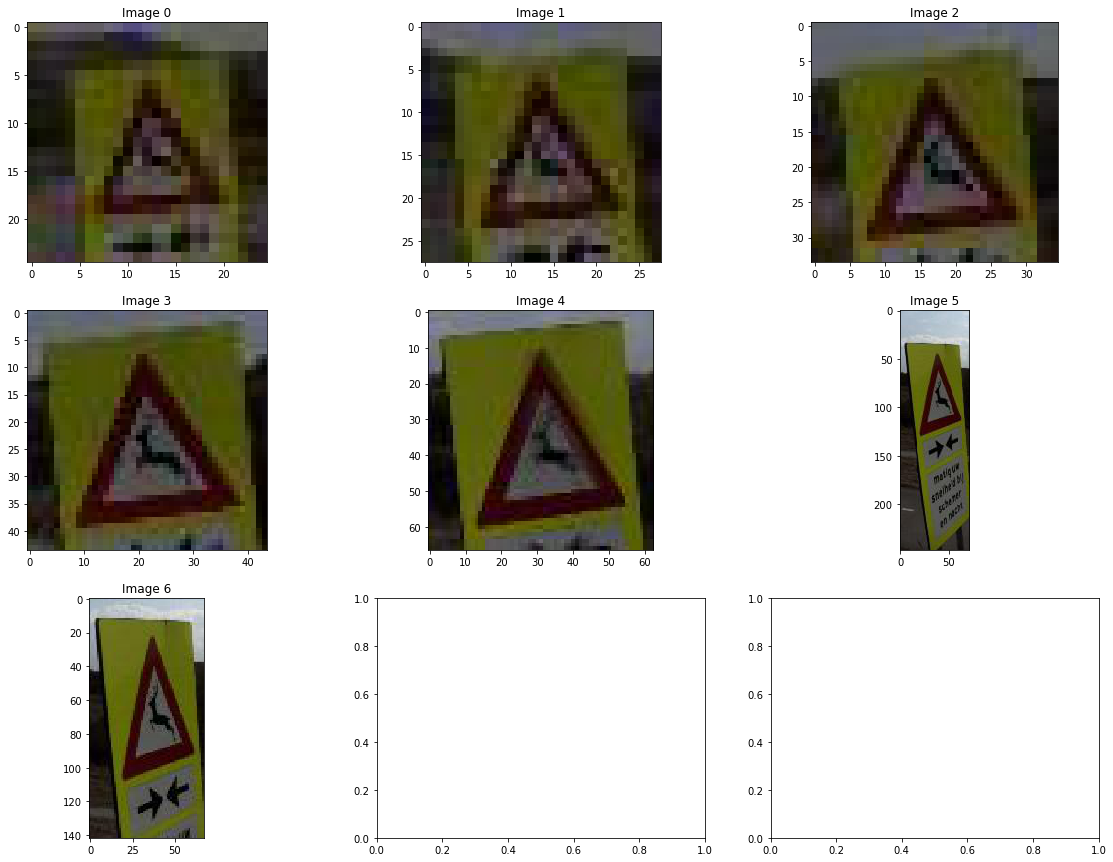

In [397]:
labels = []
for (i, annot) in enumerate(annotations):
     labels.append(annot[1])
print_series(serie, annotations)

In [422]:
# SAVE RESULTS
for item in annotations:
    annot_total.append(item)
print('Annotations saved!')

df_annot = pd.DataFrame(annot_total)
df_annot.to_csv('stacked_%d.csv' % version)
version = version + 1


Annotations saved!


In [300]:

annot_total



[('00774.jpg', '???'),
 ('00775.jpg', '???'),
 ('00776.jpg', '???'),
 ('00777.jpg', '???'),
 ('00778.jpg', '???'),
 ('00779.jpg', '???'),
 ('00780.jpg', '???'),
 ('00781.jpg', '???'),
 ('00782.jpg', '???'),
 ('00783.jpg', '???'),
 ('00784.jpg', '???'),
 ('01525.jpg', 'undamaged'),
 ('01526.jpg', 'damaged'),
 ('01527.jpg', 'undamaged'),
 ('01528.jpg', 'damaged'),
 ('01529.jpg', 'undamaged'),
 ('01530.jpg', 'damaged'),
 ('01531.jpg', 'undamaged'),
 ('01532.jpg', 'damaged'),
 ('01533.jpg', 'undamaged'),
 ('01534.jpg', 'damaged'),
 ('01830.jpg', 'undamaged'),
 ('01831.jpg', 'undamaged'),
 ('01832.jpg', 'undamaged'),
 ('01833.jpg', 'undamaged'),
 ('01834.jpg', 'nosign'),
 ('01835.jpg', 'undamaged'),
 ('01836.jpg', 'nosign'),
 ('01837.jpg', 'undamaged'),
 ('01838.jpg', 'undamaged'),
 ('01839.jpg', 'nosign'),
 ('01840.jpg', 'undamaged'),
 ('01841.jpg', 'nosign'),
 ('01842.jpg', 'undamaged'),
 ('01843.jpg', 'undamaged'),
 ('01844.jpg', 'undamaged'),
 ('01845.jpg', 'nosign'),
 ('01846.jpg', 'no